# Random Walks

I thought about this while watching baby turtles walk into the ocean. Despite each wave appearing to have a roughly equal chance of pulling the turtles into the sea or washing them back up the beach, they all eventually made it!

If we imagine turtle walking into the sea to be a bounded (because the wave can't push them beyond a certain point up the beach) random walk (which is certainly appears to be - turtle walking/swimming is negligible compared to the strength of the waves) do we reproduce the fact that they all end up in the ocean?

See:
* https://en.wikipedia.org/wiki/Random_walk
* https://en.wikipedia.org/wiki/Gambler%27s_ruin

## Imports etc

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

import cython

%load_ext Cython

%run ~/.jupyter/config.ipy

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1d random walk

Mean is approx zero: 0.044
Std is approx sqrt(num_steps): 10.024138067684422.


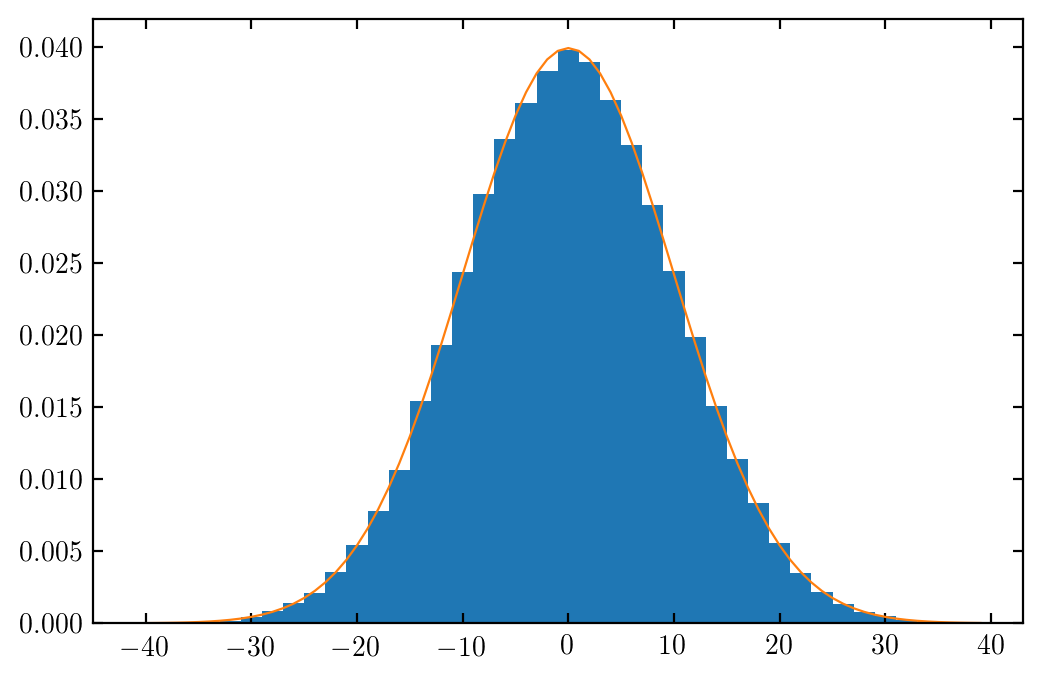

In [45]:
# What is the distribution of ending points after some number of steps?

num_steps = 100
exp_std = np.sqrt(num_steps)
pos_after_x = [
    np.sum(np.random.choice([-1, 1], size=num_steps)) for i in range(100000)
]

_, ax = plt.subplots()
ax.hist(pos_after_x, bins=np.arange(-4 * exp_std - 1, 4 * exp_std + 1, 2), density=True)
print("Mean is approx zero: {}\nStd is approx sqrt(num_steps): {}.".format(np.mean(pos_after_x), np.std(pos_after_x)))

x = np.arange(-40, 40)
y = scipy.stats.norm(0, scale=np.sqrt(num_steps)).pdf(x)
ax.plot(x, y);

Not sure what I am learning here...


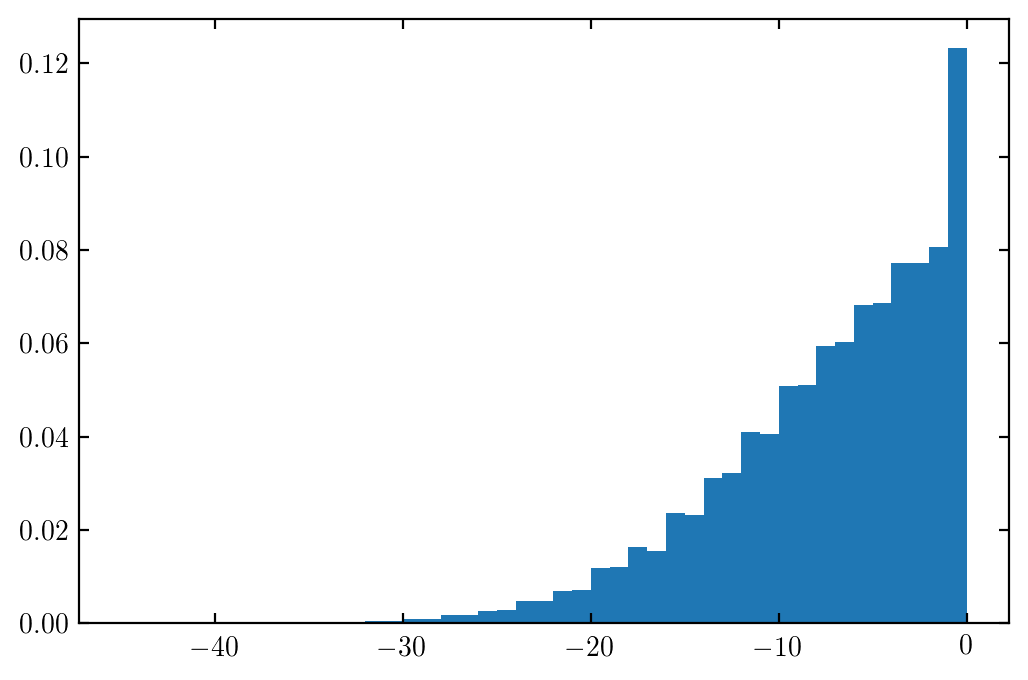

In [43]:
# What is the minimum that we reached in each path?

num_steps = 100
min_pos = [
    np.min(np.cumsum(np.random.choice([-1, 1], size=num_steps))) for i in range(100000)
]

_, ax = plt.subplots()
ax.hist(min_pos, np.arange(np.min(min_pos), 1), density=True)

print("Not sure what I am learning here...")

# Bounded random walk

In [39]:
%%cython
# add -a to the above line to get the yellow!
cimport cython
from libc.stdlib cimport rand, RAND_MAX

@cython.boundscheck(False)
@cython.wraparound(False)
@cython.nonecheck(False)
def bounded_result(long[:] rw):
    # rw is a series of -1, 1
    cdef int res = 0
    cdef int i
    for i in range(len(rw)):
        res += rw[i]
        if res < 0:
            res = 0
    return res

@cython.nonecheck(False)
def time_to_cross(int boundary): 
    cdef int res = 0
    cdef int steps = 0
    cdef double one_over_RAND_MAX = 1 / RAND_MAX # so that we don't check zero division in the loop
    while res < boundary:
        res += <int>(rand() * one_over_RAND_MAX + 0.5) * 2 - 1 # a weird fast way to get [-1, 1]
        if res < 0:
            res = 0
        steps += 1
    return steps       

Whoa! The distribution of positions is now just the one wing of the same normal dist as before!


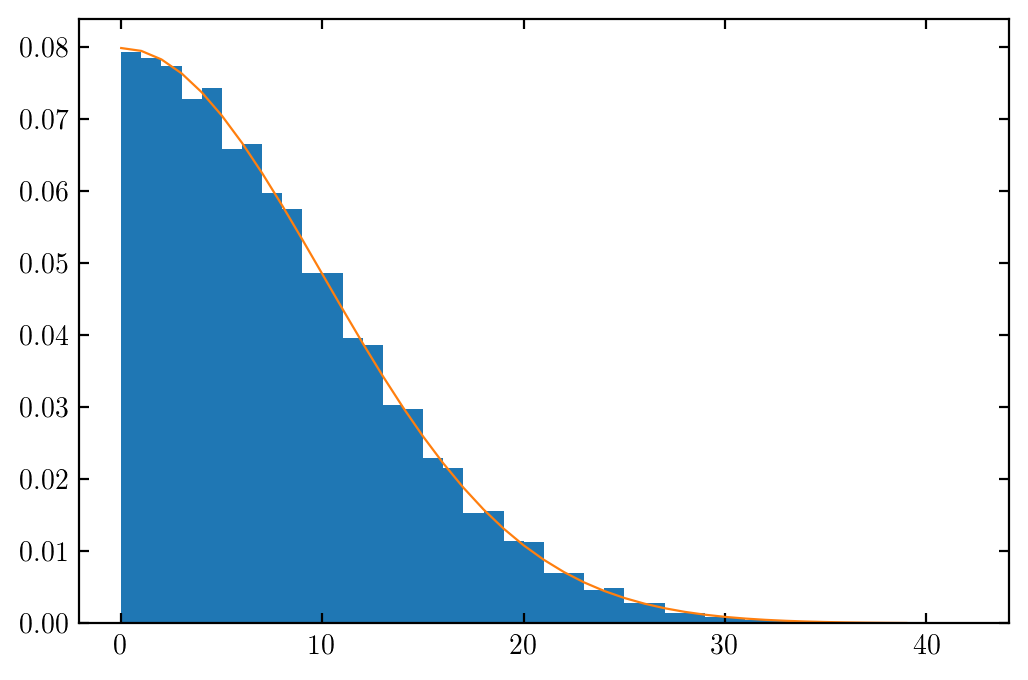

In [91]:
num_steps = 100
exp_std = np.sqrt(num_steps)
pos_after_x = [
    bounded_result(np.random.choice([-1, 1], size=num_steps)) for i in range(100000)
]

_, ax = plt.subplots()
ax.hist(pos_after_x, bins=np.arange(0, np.max(pos_after_10) + 1), density=True)

x = np.arange(0, 40)
y = scipy.stats.norm(0, scale=np.sqrt(num_steps)).pdf(x) * 2
ax.plot(x, y);

print("Whoa! The distribution of positions is now just the one wing of the same normal dist as before!")

We always eventually cross every boundary. This is actually true in both the bounded and non bounded case. It is known as the gambler's ruinI suggest the alternative, happier name - sea turtle success. Assuming a random walk, the turtles will always make it to a point where wave action is negligibleand they can swim away


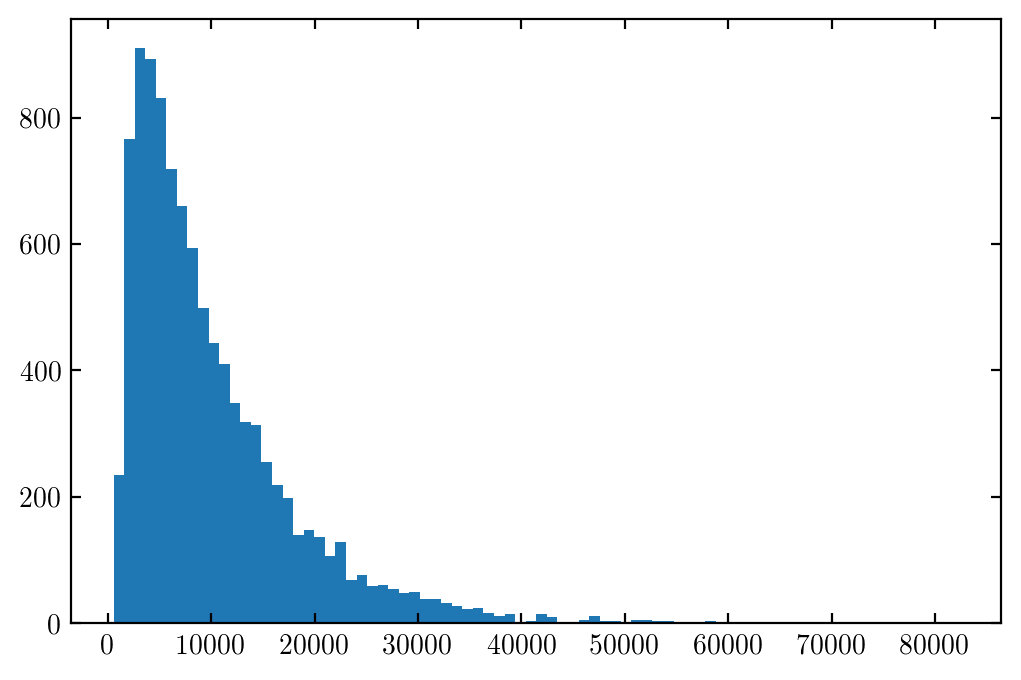

In [40]:
times = [time_to_cross(100) for i in range(10000)]

_, ax = plt.subplots()
ax.hist(times, 80)
print("We always eventually cross every boundary. This is actually true in both the bounded and non bounded case. It is known as the gambler's ruin\
I suggest the alternative, happier name - sea turtle success. Assuming a random walk, the turtles will always make it to a point where wave action is negligible\
and they can swim away")

# Random Walks are beautiful

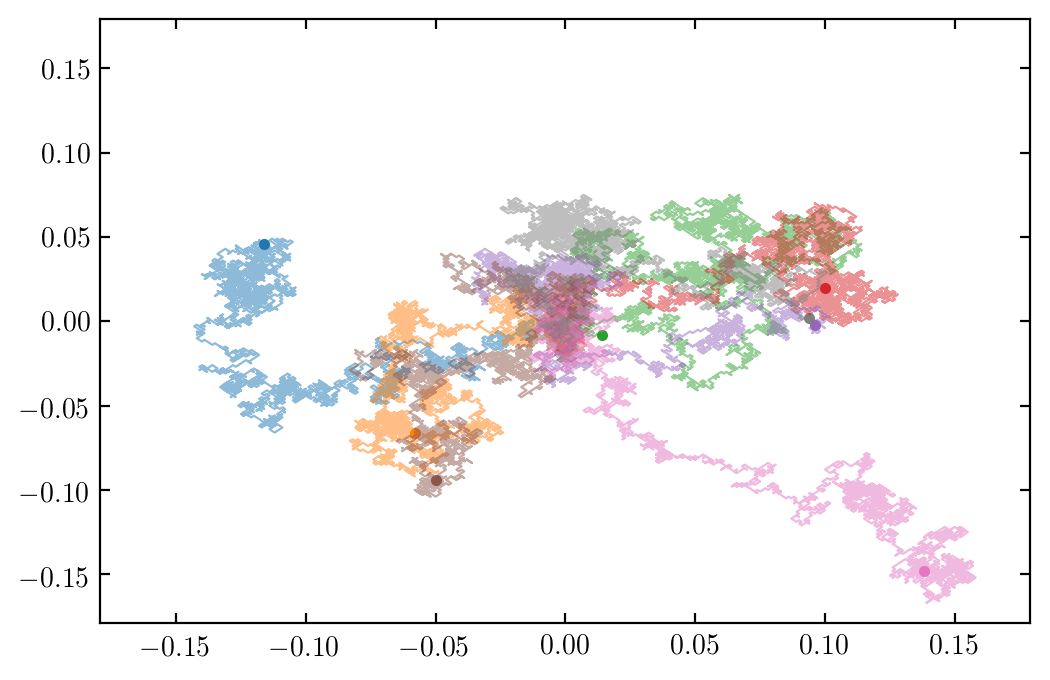

In [80]:
def get_pos(n, eps):
    return np.cumsum(np.random.choice([-1*eps, 1*eps], size=n))
    
num_steps, epsilon = 5000, 1e-3
_, ax = plt.subplots()

for i in range(8):
    x, y = get_pos(num_steps, epsilon), get_pos(num_steps, epsilon)
    ax.plot(x, y, alpha=0.5)
    ax.scatter(x[-1], y[-1])
    
max_lim = max(np.max(np.abs(ax.get_xlim())),np.max(np.abs(ax.get_ylim())))
ax.set(xlim=(-max_lim, max_lim), ylim=(-max_lim, max_lim));

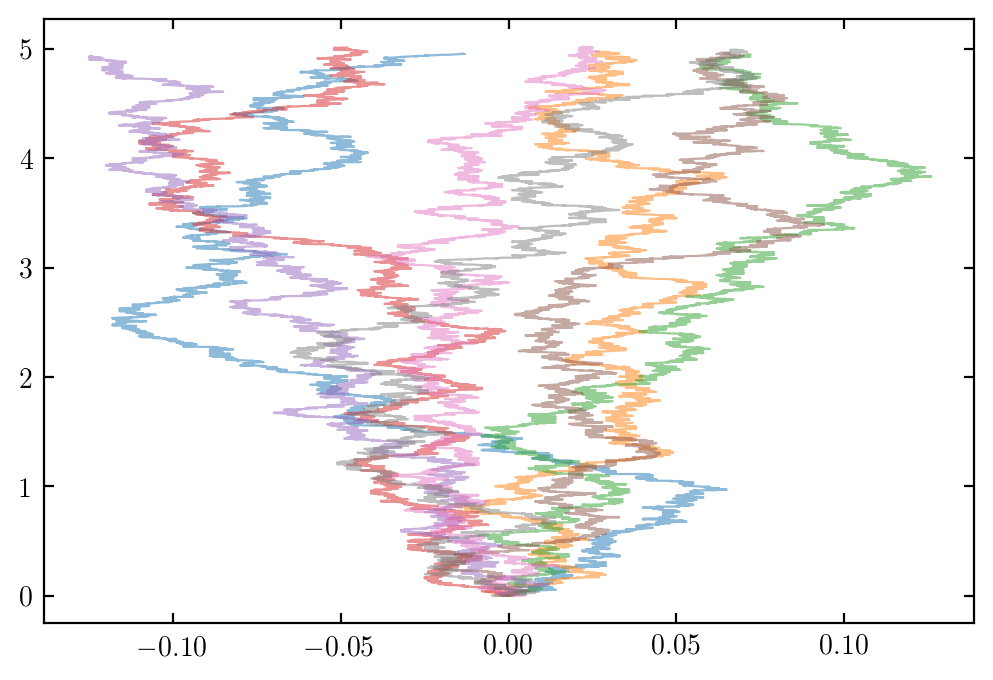

In [99]:
# Same as before but with a constant vertical motion on the same scale as the random walk
# Meant to mimic smoke, which follows brownian motion which is ~ random walk
num_steps, epsilon = 5000, 1e-3
_, ax = plt.subplots()

for i in range(8):
    x, y = get_pos(num_steps, epsilon), np.arange(num_steps) * epsilon + get_pos(num_steps, epsilon)
    ax.plot(x, y, alpha=0.5)
    
max_lim = np.max(np.abs(ax.get_xlim()))
ax.set(xlim=(-max_lim, max_lim));